$\qquad$ $\qquad$$\qquad$  **TDA 233 Machine Learning: Home Assignment 4 in Clustering** <br />
$\qquad$ $\qquad$$\qquad$ **Goal: K-means, GMM, EM**<br />
$\qquad$ $\qquad$$\qquad$                   **Grader: Lovisa** <br />
$\qquad$ $\qquad$$\qquad$                     **Due Date: 2021-03-19** <br />
$\qquad$ $\qquad$$\qquad$                   **Submitted by: Name, Personal No., Email** <br />


---


GENERAL GUIDELINES:
*   All solutions to theoretical and pratical problems must be submitted in this ipynb notebook, and equations wherever required, should be formatted using LaTeX math-mode.
*   All discussion regarding practical problems, along with solutions and plots should be specified in this notebook. Include your derivations for the theoretical questions. All plots/results should be visible such that the notebook does not need to be run. However, the code in the notebook should reproduce the plots/results if we choose to run it.
*   Your name, personal number and email address should be specified above.
*   All tables and other additional information should be included in this notebook.
*   **All the answers for theoretical questions must be filled in the cells created for you with "Your answer here" below each question. Feel free to add more cells if needed.**
*   Before submitting, make sure that your code can run on another computer. That all plots can show on another computer including all your writing. It is good to check if your code can run here: https://colab.research.google.com.


# K-Means Implementation [4 points]

### Q 1.1. 
Implement the basic (linear) $k$-means algorithm as described in the lecture, using the euclidean distance. Use random points sampled uniformly without replacement from the data as initialization for the centroids. Terminate the iterative procedure when the cluster assignments do not change. [**2 pts**]

### Q 1.2. 
In this exercise you will run your $k$-means algorithm implementation on the data in **hw4_data.csv**. Each row in the data is an observation, and each column is a feature. 

1. What value of $k$ do you think is suitable for this data?

2. Run your k-means implementation on the data with your choice of suitable $k$. Run the algorithm 5 times on the data and plot the resulting cluster assignments for each run. Also note for each run how many iterations were required before convergence. 

3. Do you always get the same final cluster solutions and same number of required iterations? Why/why not? [**2 pts**]


**Note:** The follwing code might be useful for this excercise.

```python
import pandas as pd
data = pd.read_csv("hw4_data.csv")
data.head()
```

### Your answer here:

In [230]:
import pandas as pd
data = pd.read_csv("hw4_data.csv")
print(data.shape)

(342, 2)


[[228.   55.9]
 [225.   50.5]
 [215.   46.1]]


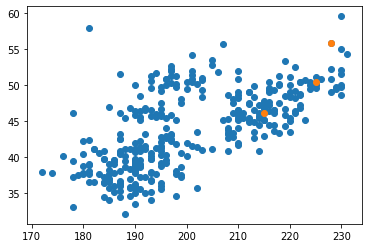

[[ 39.1 181. ]
 [ 39.5 186. ]
 [ 40.3 195. ]
 [ 36.7 193. ]
 [ 39.3 190. ]
 [ 38.9 181. ]
 [ 39.2 195. ]
 [ 34.1 193. ]
 [ 42.  190. ]
 [ 37.8 186. ]
 [ 37.8 180. ]
 [ 41.1 182. ]
 [ 38.6 191. ]
 [ 34.6 198. ]
 [ 36.6 185. ]
 [ 38.7 195. ]
 [ 42.5 197. ]
 [ 34.4 184. ]
 [ 46.  194. ]
 [ 37.8 174. ]
 [ 37.7 180. ]
 [ 35.9 189. ]
 [ 38.2 185. ]
 [ 38.8 180. ]
 [ 35.3 187. ]
 [ 40.6 183. ]
 [ 40.5 187. ]
 [ 37.9 172. ]
 [ 40.5 180. ]
 [ 39.5 178. ]
 [ 37.2 178. ]
 [ 39.5 188. ]
 [ 40.9 184. ]
 [ 36.4 195. ]
 [ 39.2 196. ]
 [ 38.8 190. ]
 [ 42.2 180. ]
 [ 37.6 181. ]
 [ 39.8 184. ]
 [ 36.5 182. ]
 [ 40.8 195. ]
 [ 36.  186. ]
 [ 44.1 196. ]
 [ 37.  185. ]
 [ 39.6 190. ]
 [ 41.1 182. ]
 [ 37.5 179. ]
 [ 36.  190. ]
 [ 42.3 191. ]
 [ 39.6 186. ]
 [ 40.1 188. ]
 [ 35.  190. ]
 [ 42.  200. ]
 [ 34.5 187. ]
 [ 41.4 191. ]
 [ 39.  186. ]
 [ 40.6 193. ]
 [ 36.5 181. ]
 [ 37.6 194. ]
 [ 35.7 185. ]
 [ 41.3 195. ]
 [ 37.6 185. ]
 [ 41.1 192. ]
 [ 36.4 184. ]
 [ 41.6 192. ]
 [ 35.5 195. ]
 [ 41.1 18

In [364]:
%matplotlib inline
import matplotlib.pyplot as plt
import math
import random
import numpy as np
plt.scatter(data['x'], data['y'])

centroids=[]
k=3
for i in range(k):
    r=random.randint(0,data.shape[0]-1)
    centroids.append((data['x'][r],data['y'][r]))

centroids=np.array(centroids)
print(centroids)    
    
plt.scatter([i for i, j in centroids],[j for i, j in centroids])
plt.show()
new_dat=data.to_numpy()
print(new_dat)


In [335]:
def compute_Z(distances):
    Z=np.zeros((k,data.shape[0]))
    distances=np.array(distances)
    #print((distances.shape))
    for j in range(data.shape[0]-1):
        lis=[i[j] for i in distances]
        #print(lis,lis.index(min(lis)),min(lis))
        Z[lis.index(min(lis))][j]=1
    return(Z)

In [336]:
def compute_centroids(Z):
    centroids=np.true_divide(np.dot(Z,new_dat),(Z.sum(axis=1)[:,None]))
    return centroids


In [320]:
def kmeans(centroids):
    #print(centroids)
    distances=[]
    for i in range(k):
        distance=[]
        print([[x[0] for x in centroids][i]],[[x[1] for x in centroids][i]])
        for j in range(data.shape[0]-1):
            euclid=(data['x'][j]-[[x[0] for x in centroids][i]])**2+(data['y'][j]-[[x[1] for x in centroids][i]])**2
            euclid=math.sqrt(euclid)
            distance.append(euclid)
        distances.append(distance)  
    Z=compute_Z(distances)
    centroids=compute_centroids(Z)
    return centroids

In [361]:
def kmeans_(centroids):
    print(new_dat.shape,centroids.shape)
    #d=np.subtract(new_dat,np.transpose(centroids))
    d=new_dat-centroids
    distances=np.dot(d,np.transpose(d))
    Z=compute_Z(distances)
    centroids=compute_centroids(Z)
    return centroids

In [362]:

for i in range(2):
    new_centroids=kmeans_(centroids)
    centroids=new_centroids
    print(centroids,i)

(342, 2) (3, 2)


ValueError: operands could not be broadcast together with shapes (342,2) (3,2) 

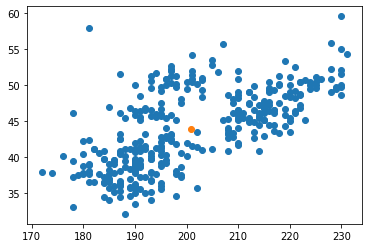

In [294]:
plt.scatter(data['x'], data['y'])
plt.scatter([j for i, j in centroids],[i for i, j in centroids])
plt.show()

# GMM [2 pts]

We will now consider a mixture model. The probability of an observation $x \in \mathbb{R}^D$ is given by: $$p(x) = \sum_{k=1}^{K} \pi_k P(x|\theta_k)$$ where $\pi_k$ are the probabilities a priori and $P(x|\theta_k)$ are multi-dimensional Gaussian characterized by their mean $\mu_k$ and their co-variance matrix $\Sigma_k$
, i.e. $\theta_k = (\mu_k, \Sigma_k)$.

### Q 2.1.
Plot the probability distribution $p(x)$ for D=1, K = 2, $\pi_1 = \pi_2 = 0.5$ and $\mu_1 = 1$, $\mu_2 = 5$,$\Sigma_1 = 3$,$ \Sigma_2 = 5$. **[1 pts]**

### Q 2.2.

What is the posterior probability that an example $x=1.5$ was produced by the Gaussian $k=1$,i.e. $P(\theta_1| x)$ ? **[1 pts]**

### Your answer here:

# EM algorithm for GMM [6 pts]

The data used for this assignment will be one-dimensional and given by the x column from the "hw4_data". 

### Q 3.1.

For this assignment we assume that the x data distribution can be described by a mixture of 2 Gaussians in one dimension, of respective parameters $(\mu_1, \sigma_1^2)$ and $(\mu_2, \sigma_2^2)$. Do you think that this is a reasonable assumption to make? **[1 pts]**

### Q 3.2.

We will call $\pi_1$ and $\pi_2$ the coefficients of the two Gaussians in the mixture.

Sort the items of the sample in ascending order and use the 200 smallest values for estimating $(\mu_1, \sigma_1^2)$ and the remaining larger ones to estimate $(\mu_2, \sigma_2^2)$. Under these conditions, what values should logically be assigned to the weights $\pi_1$ and $\pi_2$ (round off to two decimal places)? Plot the resulting distribution of the mixture model for this initializing step. **[1 pts]**

### Q 3.3.

Starting from $\theta^0 = \{\mu_1, \sigma^2_1, \pi_1, \mu_2, \sigma^2_2, \pi_2\}$ obtained from the previous question, estimate the value of responsibilities $\gamma(z_{nk})$ according to the EM algorithm. Print the values in the same order as that of the sorted data. **[2 pts]**

### Q 3.4.
Re-estimate the parameters i.e. calculate $\theta^1$, using the current responsibilities. Plot the resulting distribution of the mixture model for this first step. **[2 pts]** 

   
**Note:** $\theta^{i}$ denotes the $i^{th}$ step estimate when using the EM algorithm.

### Your answer here: